In [6]:
# import osmnx
import osmnx as ox
import geopandas as gpd

# Specify the area of interest
place_name = "City of London, England, UK"

# Get place boundary related to the place name as a geodataframe
area = ox.geocode_to_gdf(place_name)

area

,geometry,bbox_north,bbox_south,bbox_east,bbox_west,place_id,osm_type,osm_id,lat,lon,class,type,place_rank,importance,addresstype,name,display_name
0,"POLYGON ((-0.11383 51.51826, -0.11380 51.51812...",51.523312,51.506871,-0.072762,-0.11383,273135560,relation,51800,51.515618,-0.091998,boundary,administrative,12,0.656625,city,City of London,"City of London, Greater London, England, Unite..."


<AxesSubplot: >

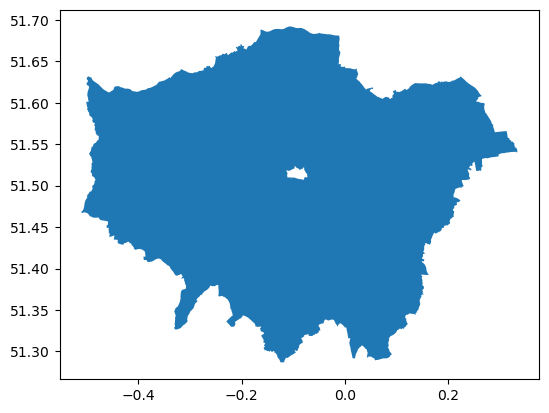

In [7]:
# import osmnx
import osmnx as ox
import geopandas as gpd

# Specify the area of interest
place_name_GL = "London, England, UK"

# Get place boundary related to the place name as a geodataframe
GL = ox.geocode_to_gdf(place_name_GL)

GL.plot()

<AxesSubplot: >

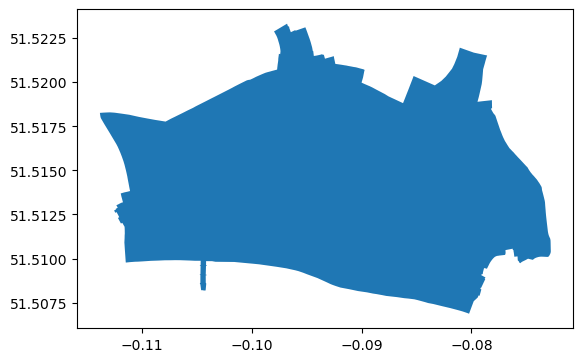

In [8]:
area.plot()


In [9]:
# List key-value pairs for tags
tags = {'tourism': "attraction"}   

attractions = ox.features_from_place(place_name, tags)
attractions.head()
print(attractions.columns.tolist())

['geometry', 'addr:city', 'addr:country', 'addr:housenumber', 'addr:street', 'source', 'amenity', 'name', 'level', 'wheelchair', 'tourism', 'description', 'nodes', 'addr:housename', 'addr:postcode', 'alt_name', 'architect', 'building', 'building:colour', 'building:levels', 'building:material', 'building:shape', 'height', 'loc_name', 'name:en', 'name:es', 'name:ko', 'name:uk', 'note', 'roof:colour', 'roof:height', 'roof:material', 'roof:shape', 'start_date', 'use', 'website', 'wikidata', 'wikipedia', 'access', 'building:architecture', 'churchmanship', 'denomination', 'diocese', 'heritage', 'heritage:operator', 'heritage:website', 'historic', 'inscription_date', 'listed_status', 'opening_hours', 'ref:GB:nhle', 'ref:dove', 'religion', 'source:heritage', 'architect:wikidata', 'deanery', 'fax', 'parish', 'phone', 'year_of_construction', 'building:part', 'dedication:wikidata', 'name:af', 'name:fr', 'name:he', 'name:ja', 'name:la', 'name:lt', 'name:pl', 'name:zh', 'payment:cash', 'payment:mas

<AxesSubplot: >

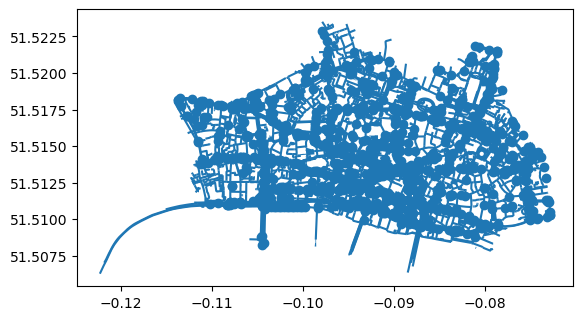

In [10]:
# List key-value pairs for tags
place_name = "City of London, England, UK"
tags = {'highway': True}   
streets = ox.features_from_place(place_name, tags)
streets.plot()

In [11]:
streets.head()

button_operated         crossing   highway tactile_paving  \
element_type osmid                                                              
node         104319             yes  traffic_signals  crossing            yes   
             104320             yes  traffic_signals  crossing            NaN   
             107606             NaN  traffic_signals  crossing            yes   
             107643             NaN  traffic_signals  crossing            NaN   
             108389             NaN  traffic_signals  crossing            yes   

                    traffic_signals:sound traffic_signals:vibration  \
element_type osmid                                                    
node         104319                    no                       yes   
             104320                   NaN                       NaN   
             107606                   NaN                       NaN   
             107643                   NaN                       NaN   
             108389                    no                       NaN   

                                      geometry crossing_ref crossing:island  \
element_type osmid                                                            
node         104319  POINT (-0.09881 51.51537)          NaN             NaN   
             104320  POINT (-0.09688 51.51472)      pelican             NaN   
             107606  POINT (-0.07780 51.51312)      pelican              no   
             107643  POINT (-0.09601 51.51192)      pelican        separate   
             108389  POINT (-0.10780 51.51761)      pelican             NaN   

                    traffic_calming  ... disused:cycleway:right  \
element_type osmid                   ...                          
node         104319             NaN  ...                    NaN   
             104320             NaN  ...                    NaN   
             107606             NaN  ...                    NaN   
             107643             NaN  ...                    NaN   
             108389             NaN  ...                    NaN   

                    proposed:emergency is_sidepath:of:name name:left  \
element_type osmid                                                     
node         104319                NaN                 NaN       NaN   
             104320                NaN                 NaN       NaN   
             107606                NaN                 NaN       NaN   
             107643                NaN                 NaN       NaN   
             108389                NaN                 NaN       NaN   

                    name:right surface:note ref:bag area:highway ways type  
element_type osmid                                                          
node         104319        NaN          NaN     NaN          NaN  NaN  NaN  
             104320        NaN          NaN     NaN          NaN  NaN  NaN  
             107606        NaN          NaN     NaN          NaN  NaN  NaN  
             107643        NaN          NaN     NaN          NaN  NaN  NaN  
             108389        NaN          NaN     NaN          NaN  NaN  NaN  

[5 rows x 291 columns]

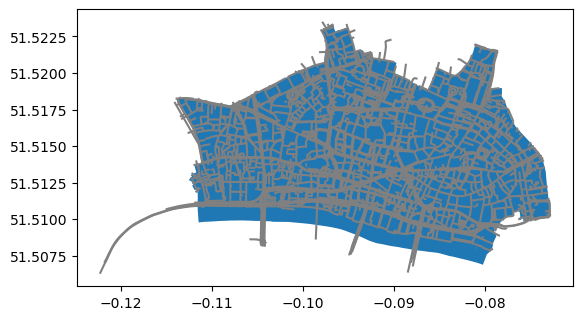

In [12]:
streets_S = streets.loc[streets.geometry.geometry.type=='LineString']
base = area.plot()
base2 = streets_S.plot(ax=base, color = "grey")

geometry  \
element_type osmid                                                          
way          33083748   POLYGON ((-0.09636 51.51442, -0.09612 51.51438...   
             367646970  POLYGON ((-0.08747 51.51340, -0.08747 51.51341...   

                                                                    nodes  \
element_type osmid                                                          
way          33083748   [373348206, 3269232240, 3269232238, 4390540714...   
             367646970  [3715515068, 3715515076, 3715515073, 371551506...   

                       addr:city addr:postcode addr:street building  \
element_type osmid                                                    
way          33083748     London      EC4M 9AF  New Change      yes   
             367646970    London           NaN    Cornhill      yes   

                       building:levels changing_table            name  \
element_type osmid                                                      
way          33083748                6            yes  One New Change   
             367646970             NaN            NaN  Royal Exchange   

                               name:en  ... heritage:operator  \
element_type osmid                      ...                     
way          33083748   One New Change  ...               NaN   
             367646970  Royal Exchange  ...                he   

                                                         heritage:website  \
element_type osmid                                                          
way          33083748                                                 NaN   
             367646970  https://historicengland.org.uk/listing/the-lis...   

                       inscription_date listed_status            name:ru  \
element_type osmid                                                         
way          33083748               NaN           NaN                NaN   
             367646970       1950-01-04       Grade I  Королевская биржа   

                       name:zh ref:GB:nhle   source:heritage wheelchair  \
element_type osmid                                                        
way          33083748      NaN         NaN               NaN        NaN   
             367646970   皇家交易所     1064713  Historic England        yes   

                       year_of_construction  
element_type osmid                           
way          33083748                   NaN  
             367646970          1841 - 1844  

[2 rows x 34 columns]

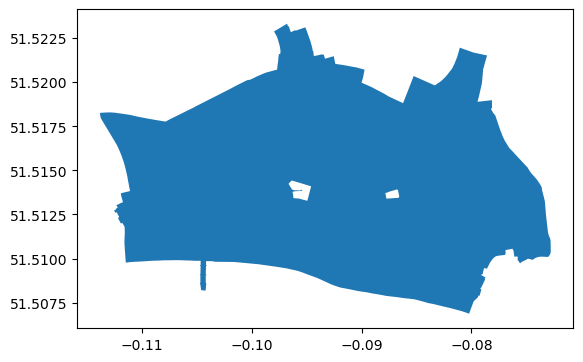

In [13]:
# List key-value pairs for tags
place_name = "City of London, England, UK"
tags = {'shop': "mall"}
base= area.plot()
shops = ox.features_from_place(place_name, tags)
shops.plot(ax=base, color="white")
shops.head()

<AxesSubplot: >

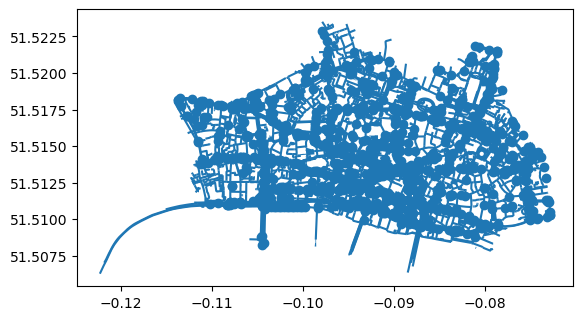

In [14]:
streets.plot()

In [15]:
attractions = attractions[["name", "geometry"]]
attractions = attractions.drop_duplicates(subset=['name'])
attractions_c = attractions[attractions['name'].notnull()]

# bb = attractions_c[attractions_c["name"] == "Big Ben"]
# bb
attractions_c


name  \
element_type osmid                                                   
node         5520405422                      Petticoat Lane Market   
             6448535913                                 Alban Gate   
             8047413197                         City Visitor Trail   
             10996315066           Behind Sweeney Todd barber shop   
way          4959489                                30 St Mary Axe   
             31755876                     St Bartholomew-The Great   
             90244113                              St. Mary-Le-Bow   
             369161987                         St Paul's Cathedral   
             378493707                               London Bridge   
             539317283                                   Guildhall   
             691025684                           Whitefriars Crypt   
             702823179                           The Garden at 120   
             1184102361                         Round Reading Room   
             1184102362                 Weston Room (Rolls Chapel)   
             1184102363                          The Original Cell   
relation     553472                                Bank of England   
             3374550      The Monument to the Great Fire of London   

                                                                   geometry  
element_type osmid                                                           
node         5520405422                           POINT (-0.07902 51.51788)  
             6448535913                           POINT (-0.09373 51.51750)  
             8047413197                           POINT (-0.10047 51.51359)  
             10996315066                          POINT (-0.10996 51.51435)  
way          4959489      POLYGON ((-0.07993 51.51447, -0.07994 51.51440...  
             31755876     POLYGON ((-0.09978 51.51895, -0.09981 51.51894...  
             90244113     POLYGON ((-0.09355 51.51394, -0.09355 51.51394...  
             369161987    POLYGON ((-0.09904 51.51353, -0.09904 51.51350...  
             378493707    POLYGON ((-0.08785 51.50688, -0.08786 51.50686...  
             539317283    POLYGON ((-0.09229 51.51598, -0.09229 51.51580...  
             691025684    POLYGON ((-0.10747 51.51318, -0.10745 51.51319...  
             702823179    POLYGON ((-0.08121 51.51187, -0.08092 51.51198...  
             1184102361   POLYGON ((-0.10967 51.51544, -0.10968 51.51546...  
             1184102362   POLYGON ((-0.11107 51.51520, -0.11082 51.51523...  
             1184102363   POLYGON ((-0.11134 51.51526, -0.11126 51.51528...  
relation     553472       POLYGON ((-0.08744 51.51394, -0.08796 51.51379...  
             3374550      POLYGON ((-0.08598 51.51015, -0.08587 51.51012...

<AxesSubplot: >

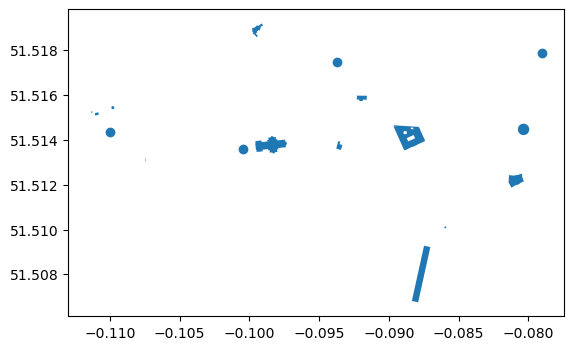

In [16]:
attractions.plot()

In [92]:
from ipyleaflet import Map, Marker, GeoData, basemaps, LayersControl, Popup
from ipywidgets import HTML

center = (51.51788, -0.07902)
map = Map(center=center, zoom=12)

# Add a draggable marker to the map
# Dragging the marker updates the marker.location value in Python
#marker = Marker(location=center, draggable=True)
#map.add_control(marker)

geo_data_attractions = GeoData(geo_dataframe = attractions,
                   style={'color': 'black', 'fillColor': '#3366cc', 'opacity':0.05, 'weight':1.9, 'dashArray':'2', 'fillOpacity':0.6},
                   hover_style={'fillColor': 'red' , 'fillOpacity': 0.2},
                   name = 'Attractions')

#map.add(geo_data_attractions, )
#map.add(LayersControl())

attraction_points = attractions.loc[attractions.geometry.geometry.type=='Point']

# coord_list = [(x,y) for x,y in zip(attraction_points['geometry'].x , attraction_points['geometry'].y)]
# print(coord_list)
# for poi in attraction_points.itertuples():
#     print(poi.name)
#     marker = Marker(location=(poi.geometry.x , poi.geometry.y), draggable=False)
#     pop = HTML()
#     pop.value = "Name:"
#     pop.description = poi.name
#     marker.popup = pop
#     print(pop)
#     map.add(marker)
#print(attraction_points.iloc)
#poi = attraction_points.iloc[0]
#print(poi)
print(len(attraction_points))
laenge=range(len(attraction_points))
for x in laenge:
    poi = attraction_points.iloc[x]
    #print(poi[0])
    marker2 = Marker(location=(poi.geometry.y , poi.geometry.x), draggable=False)
    pop = HTML()
    pop.value = poi[0]
    #pop.description = poi[0]
    marker2.popup = pop
    print(pop)
    map.add(marker2)

#for a in attraction_points.iloc:

display(map)

4
HTML(value='Petticoat Lane Market')
HTML(value='Alban Gate')
HTML(value='City Visitor Trail')
HTML(value='Behind Sweeney Todd barber shop')


Map(center=[51.51788, -0.07902], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', '…